<div align="justify">

#*Entregable #1: Partícula cargada en presencia de un campo magnético*#
<p><img alt="UdeA logo" height="200px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="right" hspace="10px" vspace="0px"></p>

<div align="left">

Física Computacional 1 Sem: 2024-1
* Sara A. Carvajal CC. 1193090281
* Valentina Lobo Ruiz CC. 1067912559
* Dayana Henao C.C 1001469185

##### Physics Institute - University of Antioquia

-----
*Considere dos fuerzas, la de Coulomb debida a la carga de las dos partículas y la de Lorentz para modelar la interacción de las partículas con el campo magnético. Utilice las ecuaciones para un movimiento uniformemente acelerado para simular la dinámica de las partículas en cada paso de tiempo:*

* $a=cte$
* $v=v_0+at$
* $x=x_0+v_0t+0.5at^{2}$

Para realizar el ejercicio físico, las siguientes condiciones se deben tener en cuenta: 

* Aceleración inicial nula.
* Velocidad inicial no nula.
* Las partículas inician acercándose.
* Campo magnético no nulo.



Para ello es necesario definir una clase para cada partícula, en ambas se requiere como entrada los siguientes parámetros

* Valor de las Cargas
* Masa de las particulas
* Valor de coordenadas (Posición inicial) X,Y,Z
* Derivadas de X,Y,Z (Velocidades inicial)
* Segunda derivada de X,Y,Z (Aceleraciones inicial)



In [64]:
import numpy as np 
import matplotlib.pyplot as plt

class Particula:
    masa = 0  # kg
    carga = 0  # Carga C 
    posicion = []  # metros 
    velocidad = []  # m/s 
    aceleracion = [0, 0, 0]  # m/s²
    campomagnetico = []
    k = 1 #8.98e9  # Nm²/C²  
    dt=0.002 #s
    pasos = 1000 
    t = np.arange(0,1000*dt,dt )
    

    def __init__(self, _masa, _carga,_posicion, _velocidad,_campmagnetico):
        """ Asigna los valores a las partículas de la clase:
        Parámetros:
        _masa: Valor de la masa de la partícula
        _carga: Arreglo de dos entradas correspondientes al valor de las cargas de las partículas
        _posición: arreglo de 3 entradas correspondiente a la posición inicial de las partículas
        _velocidad: arreglo de 3 entradas correspondiente a la velocidad inicial de las partículas, no debe ser nula
        _aceleración: arreglo de 3 entradas correspondiente a la aceleración inicial de las partículas (Es cero)
        _campmagnetico: arreglo de 3 entradas correspondiete al campo magnético
        _tiempo: valor del tiempo total del movimiento"""
        
        self.masa = _masa
        self.carga = _carga
        self.posicion = _posicion
        self.velocidad = _velocidad
        self.campomagnetico = _campmagnetico
        
    def fuerza_lor(self,v1, v2, particula2):
        """Calcula la fuerza de Lorentz para dos particulas en un instante de tiempo
        Parámetros :
        v1: Velocidad en 3 dim particula 1
        v2: Velocidad en 3 dim particula 2
        Particula2: Objeto creado con la clase Particula 
        return: una lista con la fuerza de lorentz para cada particula
        """

        #Fuerza de lorentz particula 1
        fl1 = self.carga * np.cross(np.array(v1), np.array(self.campomagnetico))
 
        #fuerza de lorentz particula 2}
        fl2 = particula2.carga * np.cross(np.array(v2), np.array(self.campomagnetico))


        return  [fl1, fl2]
    
    def fuerza_c(self,x1, x2, particula2):
        """Calcula la fuerza de Coulomb para dos particulas en un instante de tiempo
        Parámetros:
        x1: Posición en 3 dim particula 1
        x2 : Posición en 3 dim particula 2
        Particula2: Objeto creado con la clase Particula 
        return: una lista con la fuerza de coulomb para cada particula"""


        if particula2.masa == 0: #Control de error, por si se ingresa una segunda particula con masa cero.
            return [[0,0, 0],[0,0,0]]
        
        r = np.sqrt((x1[0]- x2[0])**2 + (x1[1]- x2[1])**2 + (x1[1]- x2[1])**2)
        Fc1 = self.k * self.carga * particula2.carga * (np.array(x1) - np.array(x2)) / r**3
   
        #Fuerza coulomb particula 2 
        Fc2 =  self.k * self.carga * particula2.carga * (np.array(x2) - np.array(x1)) / r**3


        return [Fc1, Fc2]
    
    def coordenadas(self, particula2, x1, x2,v1, v2, dt):
        """Calcula la posición, la velocidad y la aceletración para cada partidula en un instante de tiempo
        Parámetros:
        x1: Posición en 3 dim particula 1
        x2 : Posición en 3 dim particula 2
        v1: Velocidad en 3 dim particula 1
        v2: Velocidad en 3 dim particula 2
        Particula2: Objeto creado con la clase Particula 
        return: Una tupla compuesta por listas con la posicion, velocidad y aceleracion de las dos particulas
        """
        
        fuerzacol = self.fuerza_c(x1, x2, particula2)
        fuerzal = self.fuerza_lor(v1, v2, particula2)
        #Aceleración de la particula 1
        ax = (fuerzal[0][0] + fuerzacol[0][0]) / self.masa
        ay = (fuerzal[0][1] + fuerzacol[0][1]) / self.masa
        az = (fuerzal[0][2] + fuerzacol[0][2]) / self.masa

        #Aceleracion de la particula 2
        if particula2.masa == 0: #Control de error por si se ingresa una segunda particula sin masa
            ax_, ay_, az_ = 0, 0, 0
        else:
           ax_ = (self.fuerza_lor(v1, v2, particula2)[1][0] + fuerzacol[1][0]) / particula2.masa
           ay_ = (self.fuerza_lor(v1, v2, particula2)[1][1] + fuerzacol[1][1]) / particula2.masa
           az_ = (self.fuerza_lor(v1, v2, particula2)[1][2] + fuerzacol[1][2]) / particula2.masa

        #Velocidad de la particula 1
        vx = v1[0] + (ax * dt)
        vy = v1[1] + (ay * dt)
        vz = v1[2] + (az * dt)

        #Velocidad de la particula 2
        vx_ = v2[0] + (ax_ * dt)
        vy_ = v2[1] + (ay_ * dt)
        vz_ = v2[2] + (az_ * dt)

        #Posición particula 1 
        x = x1[0] + (v1[0] * dt) + ((0.5) * ax * dt**2)
        y = x1[1] + (v1[1] * dt) + ((0.5) * ay * dt**2)
        z = x1[2] + (v1[2] * dt) + ((0.5) * az * dt**2)

        #Posición particula 2 
        x_ = x2[0] + (v2[0] * dt) + ((0.5) * ax_ * dt**2)
        y_ = x2[1] + (v2[1] * dt) + ((0.5) * ay_ * dt**2)
        z_ = x2[2] + (v2[2] * dt) + ((0.5) * az_ * dt**2)


        return [x, y, z], [x_,y_,z_], [vx,vy,vz], [vx_,vy_,vz_], [ax,ay,az],[ax_,ay_,az_]
    
    def avance(self, particula2):
        """Evoluciona el sistema de forma iterativa calculando posición, velocidad y aceleracion en un t[i] en base estos 
         parámetros en  un t[i-1]
         particula2: Objeto creado con la clase Particula
         Return: Tupla con arrays compuestos con la informacion de la posicion, velocidad y aceleración de 
         las tres particulas en las direcciones x, y y z
         """
        #Condiciones iniciales particula 1
        a1 = self.aceleracion
        v1= self.velocidad
        x1 = self.posicion

        #Condiciones iniciales particula 2
        a2 = particula2.aceleracion
        v2= particula2.velocidad
        x2 = particula2.posicion

        posicionx = []
        posiciony = []
        posicionz = []

        velocidadx = []
        velocidady = []
        velocidadz = []

        aceleracionx = []
        aceleraciony = []
        aceleracionz = []

        #Loop encargado de hacer evolucionar el sistema
        for i in range(len(self.t)):
            posicionx.append(list([x1[0], x2[0]]))
            posiciony.append(list([x1[1], x2[1]]))
            posicionz.append(list([x1[2], x2[2]]))

            velocidadx.append(list([v1[0], v2[0]]))
            velocidady.append(list([v1[1], v2[2]]))
            velocidadz.append(list([v1[2], v2[2]]))

            aceleracionx.append(list([a1[0], a2[0]]))
            aceleraciony.append(list([a1[1], a2[1]]))
            aceleracionz.append(list([a1[2], a2[2]]))
            x1, x2, v1, v2, a1, a2 =self.coordenadas(particula2,x1,x2,v1,v2, self.dt)

        return (np.array(posicionx), np.array(posiciony), np.array(posicionz), 
    np.array(velocidadx), np.array(velocidady), np.array(velocidadz), np.array(aceleracionx),
    np.array(aceleraciony), np.array(aceleracionz))
       

### **Creación de las particulas**

In [65]:
particula1 = Particula(1., 5., [1,0,0], [-4., -1, 1], [0, 0,4])
particula2 = Particula(1., -5, [4,0,0], [5, 0, 2], [0, 0, 4])

x, y, z, vx, vy, vz, a_x, ay, az = particula1.avance(particula2)


### **Gráficas**

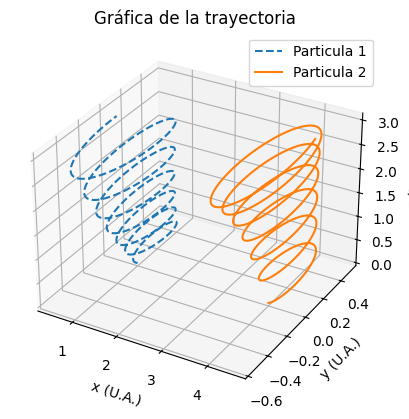

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Gráfica de la trayectoria')
ax.plot(x[:, 0], y[:, 0], z[:, 0],label='Particula 1', linestyle = "--")
ax.plot(x[:, 1], y[:, 1], z[:, 1], label='Particula 2')
ax.set_xlabel('x (U.A.)')
ax.set_ylabel('y (U.A.)')
ax.set_zlabel('z (U.A.)')
ax.legend()


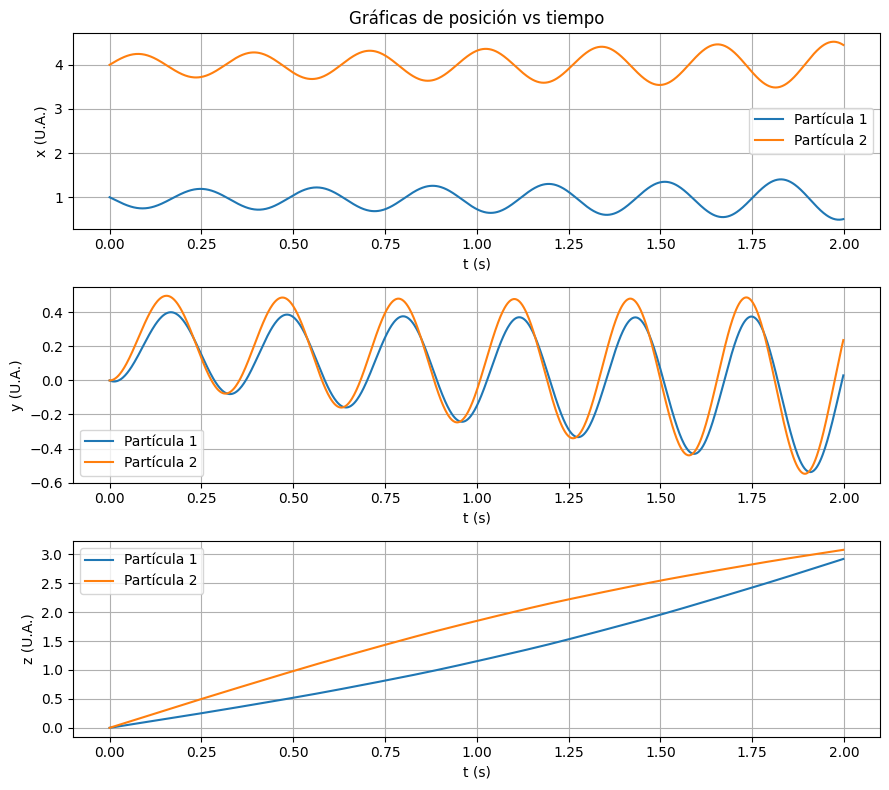

In [67]:

plt.figure(figsize=(9, 8))

# Gráfica x vs t
plt.subplot(3, 1, 1)
plt.title('Gráficas de posición vs tiempo')
plt.plot(particula1.t, x[:, 0], label="Partícula 1")
plt.plot(particula2.t, x[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('x (U.A.)')
plt.legend()
plt.grid()

# Gráfica y vs t
plt.subplot(3, 1, 2)
plt.plot(particula1.t, y[:, 0], label="Partícula 1")
plt.plot(particula2.t, y[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('y (U.A.)')
plt.legend()
plt.grid()

# Gráfica z vs t
plt.subplot(3, 1, 3)
plt.plot(particula1.t, z[:, 0], label="Partícula 1")
plt.plot(particula2.t, z[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('z (U.A.)')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()


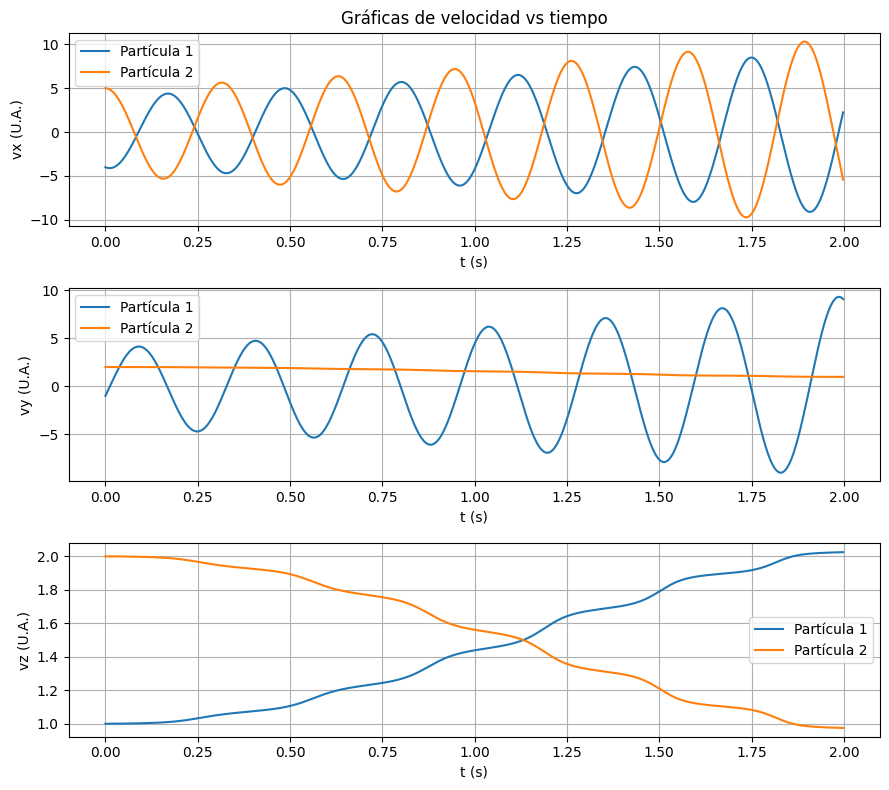

In [68]:
plt.figure(figsize=(9, 8))

# Gráfica vx vs t
plt.subplot(3, 1, 1)
plt.title('Gráficas de velocidad vs tiempo')
plt.plot(particula1.t, vx[:, 0], label="Partícula 1")
plt.plot(particula2.t, vx[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('vx (U.A.)')
plt.legend()
plt.grid()

# Gráfica vy vs t
plt.subplot(3, 1, 2)
plt.plot(particula1.t, vy[:, 0], label="Partícula 1")
plt.plot(particula2.t, vy[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('vy (U.A.)')
plt.legend()
plt.grid()

# Gráfica vz vs t
plt.subplot(3, 1, 3)
plt.plot(particula1.t, vz[:, 0], label="Partícula 1")
plt.plot(particula2.t, vz[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('vz (U.A.)')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()


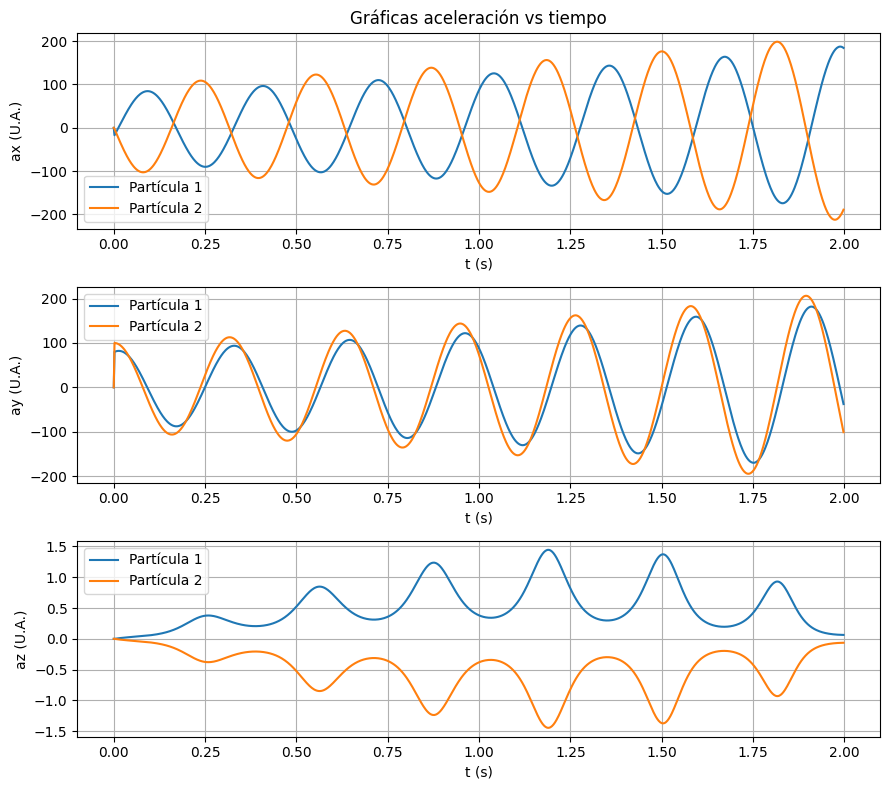

In [69]:
plt.figure(figsize=(9, 8))

# Gráfica ax vs t
plt.subplot(3, 1, 1)
plt.title('Gráficas aceleración vs tiempo')
plt.plot(particula1.t, a_x[:, 0], label="Partícula 1")
plt.plot(particula2.t, a_x[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('ax (U.A.)')
plt.legend()
plt.grid()

# Gráfica y vs t
plt.subplot(3, 1, 2)
plt.plot(particula1.t, ay[:, 0], label="Partícula 1")
plt.plot(particula2.t, ay[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('ay (U.A.)')
plt.legend()
plt.grid()

# Gráfica z vs t
plt.subplot(3, 1, 3)
plt.plot(particula1.t, az[:, 0], label="Partícula 1")
plt.plot(particula2.t, az[:, 1], label="Partícula 2")
plt.xlabel('t (s)')
plt.ylabel('az (U.A.)')
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()
